# **Let's Grow More  (LGMVIP) - "DATA SCIENCE INTERN"**
# **LGMVIP JUNE 2023**

# **Author - Shivam Gupta**

# **Beginner Level Task**

# **TASK - 3 --> Music Recommendation ML Project :**

Importing Libraries -->

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Datasets -->

In [7]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path = r"/train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"/songs.csv")
members = pd.read_csv(r"/members.csv")

# Analysing Train Dataset -->

In [8]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [9]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
3677,18nMxhvt9/B6kHGJdOp0AShmZ8s459FTxGL7BEq6niQ=,qW3qq9w3GevahTDAnLUp1k3gxOhJVQqc/MTpidfUiPE=,search,Artist more,top-hits-for-artist,1
1900,W5YIH31X9+scu84f5BZvCIlG6UOuadNB8eBhrpCEkVA=,YlL8XyZn483tAj+wzYo03MifEyrfJYqPb+rJyRdEZZA=,my library,Local playlist more,local-library,1
1103,jXm2LBx45P+vKaGsXufzR2umcZ2a9hwQlPAtNNDTzvQ=,o7kkiSSVQvCZ9gI9Sv1fi/g0cSqI3ZFC1tzVJOYvno0=,my library,Local playlist more,local-library,1
4924,swCIOSonFHPGQpJPMybADp1NDMSQmH1AaiAgY27LK8A=,kBGaQcVoF/Eh2GyC+DWk/KZrLVi0htEH1mO2FeEQH38=,my library,Local playlist more,local-library,1
5880,bk3aAKE/S4hBv4Hvd0fgTTdUZECzN6ku+7AYcYkhXjM=,ufjl9/oJJRQx/0JUEBaIeyE82HP0CF7Fy2LwOIiNiYY=,my library,Local playlist more,local-library,1
29,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,CLEDgLdGvXhoXod/9uzm9UwECV5IzqWOrXHtHXpq5+E=,my library,Local playlist more,local-library,1
259,ib5oZIKb0X16rGwGkVvX6LGEcZ9xIZ/dkedHZHeBwz0=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-library,1
5027,1qRy25s7NHRypWNR6jMWrVaU5vQCAHP0Y2wUtwrMpsQ=,VzfkuWsxAOcqzOofuyPMZ1lPGC1U9qe3O62zQFbm18k=,my library,Local playlist more,local-playlist,1
2936,+aVBg5Dxo76UZL++0OFJUVW4LFOkhccy/U0NeMisBLo=,2qlmgrtGisB2D/SsaS+scX3BCHATaSZr4O67OfLtOT0=,my library,Local playlist more,local-library,1
4470,6ZrW/6H9B32VPS5X+bgtKtZjRw+htzuG00zgwqEz8ws=,E/b+7QWv/HguM/u4uQXY1/2jeiFsxst6FRK2shsNHiU=,discover,Online playlist more,online-playlist,0


In [10]:
train.shape

(7000, 6)

In [11]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [12]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [14]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

<Axes: xlabel='source_system_tab', ylabel='count'>

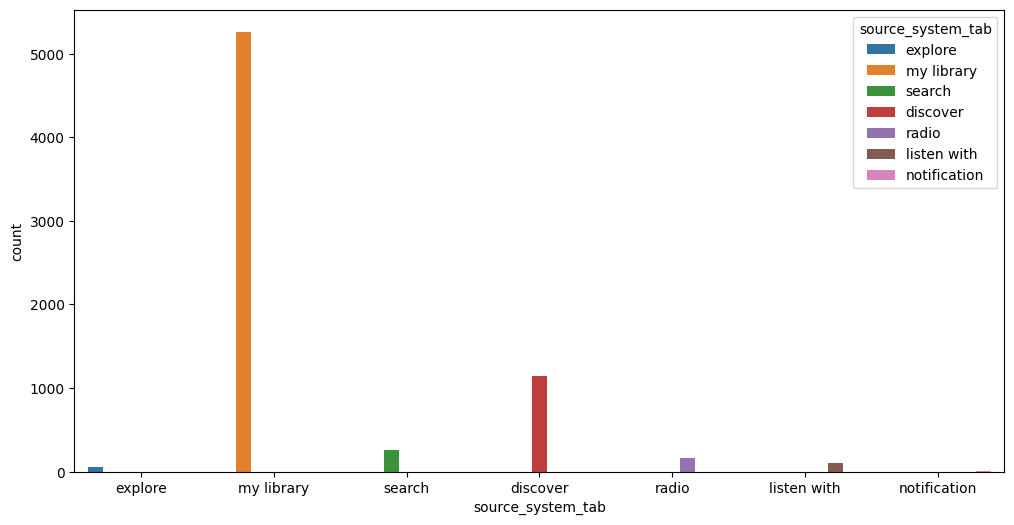

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<Axes: xlabel='source_system_tab', ylabel='count'>

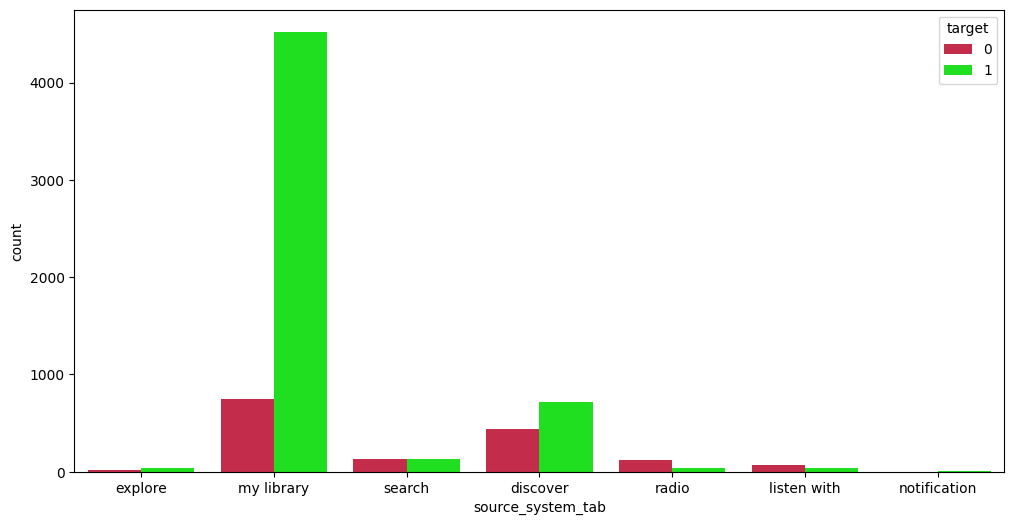

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

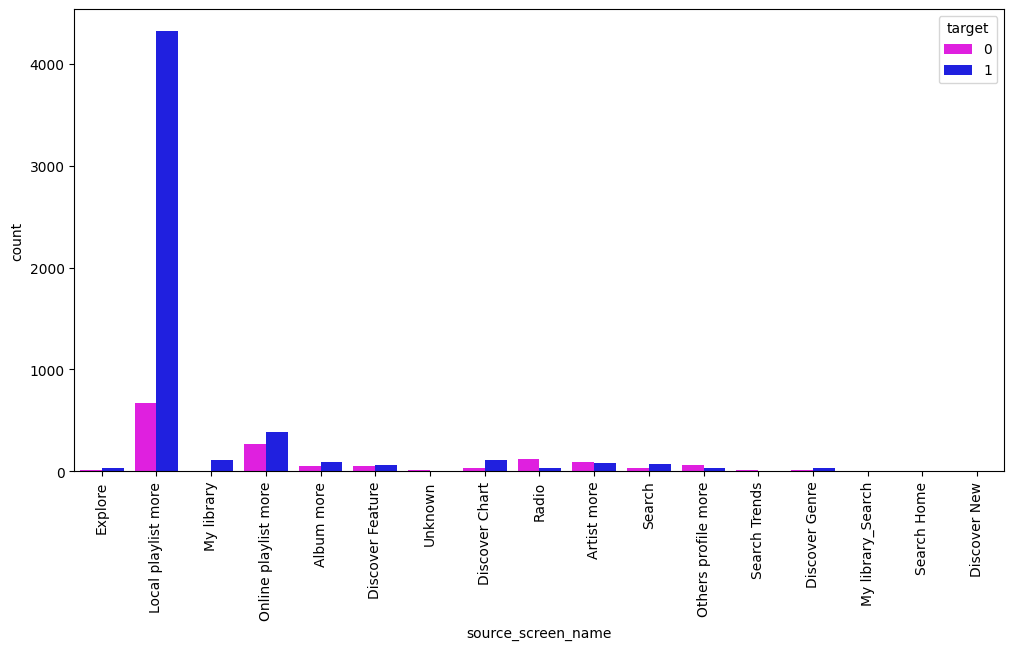

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()


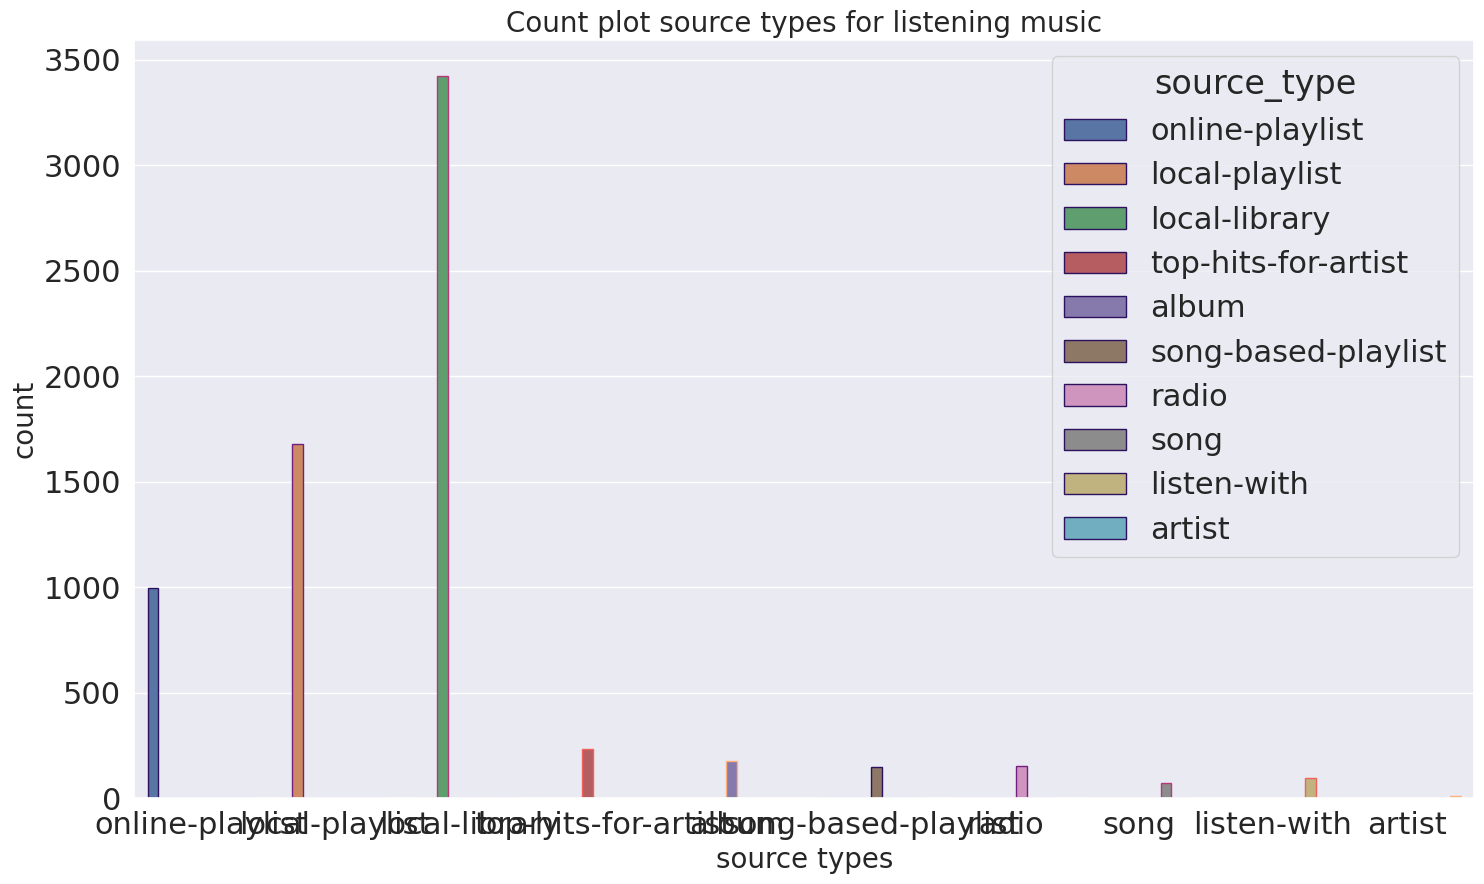

In [18]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

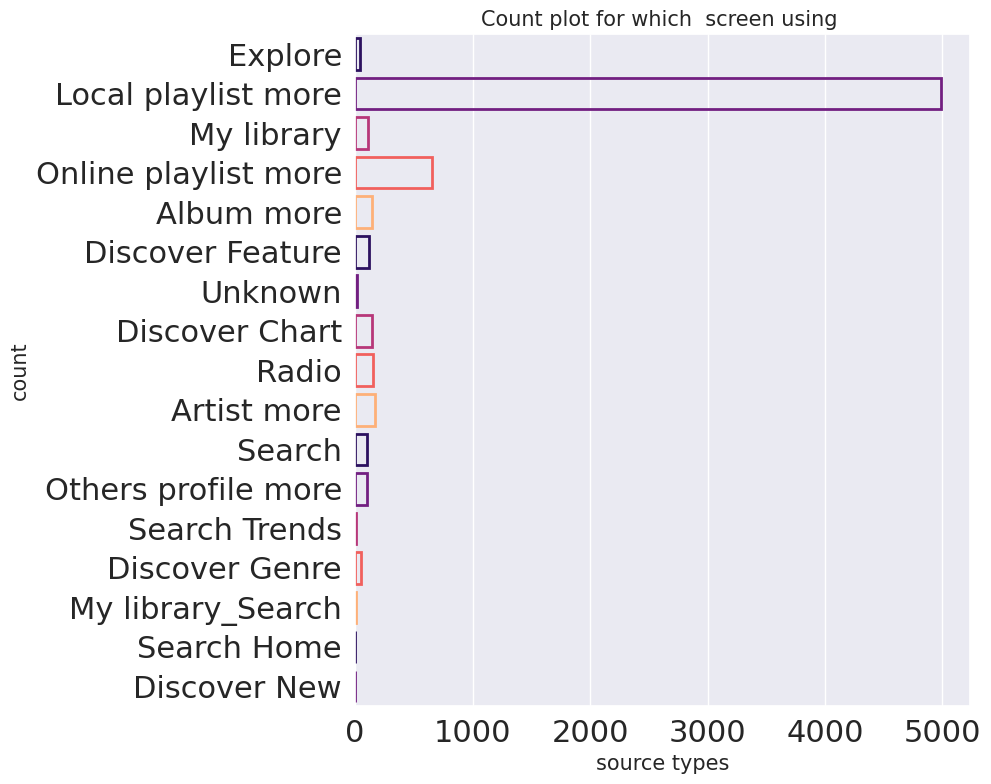

In [19]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [20]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [21]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

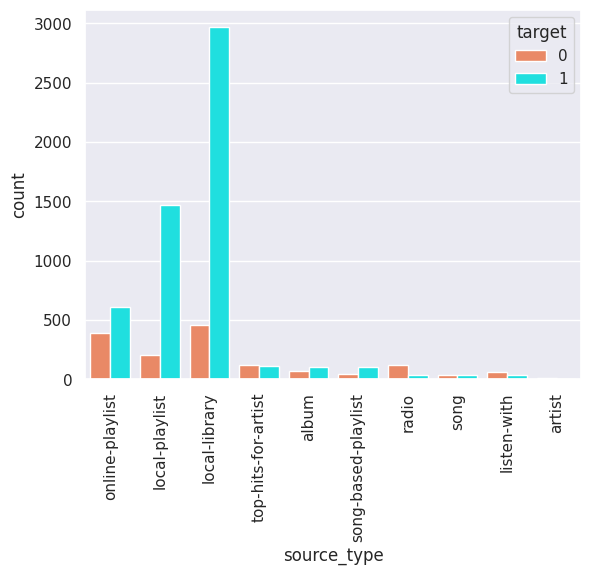

In [22]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

# Analyzing Song Dataset -->

In [23]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [24]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
15943,OLQTjYhaUYpjQPPa/ONxOI/6d6925pMK36UGHnJ+IXA=,98072,921,Various Artists,Michael Alvarado|Carissa Alvarado,NaN,52.0
18289,CdxKly34r8KQQVBc4lpi7XIaLTFWyrjoq4FFxAw5qwI=,249986,2022,Soler,湯正川,李雅桑,24.0
1888,zhwO+OhAAKlV/9t2xSxls9nmwM/kYToqkmUgXa2Gq6k=,279144,465,SEKAI NO OWARI,Nakajin,Nakajin,17.0
26655,sP33FN4DRgVqFKvHgO6PENpKglvmq4jJr+5FOwA9Has=,209188,444,NC.A,NaN,NaN,31.0
6026,5XgZj70WMKbVKO8s0Vn8TeLul5RXCa0ujW7gxU5+7R0=,222693,1609,KDrew,Kevin Nicholas Drew| Samuel Hunter Siegel,NaN,52.0
8362,1g5mSW0+7Sf/BaqiBX5eKWY0/+DoZLjz5COHZiLEvnM=,201456,444,ALi,NaN,NaN,31.0
12617,q/y6DsYL/oI17w4dIVT4HaVBYt6Y+pXcgHTUjntapqk=,202849,1609,Rye Rye,R. Berrain| R. Maya| B. Andersson| D. Van Diep...,NaN,52.0
12361,QpintNq8GH2KTRB6YsXYiQqoUh1d1ep6m2vxQhGqfgQ=,279301,465,信 (Shin),李榮浩,蘇見信,3.0
1255,yh94yH0htfECFlYkXiUlW863W+k1fnyx8oFfY5Uknz8=,299233,359,BIRDY,NaN,NaN,52.0
20240,XYjrElfd5Dk9g860q4J0WzEDKFWVjOAh4/ZVbMY+Y+s=,211951,444,DEAN,Deanfluenza| Jayrah Gibson| Count Justice,NaN,31.0


In [25]:
songs.shape

(31674, 7)

In [26]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [27]:
songs.describe()

,song_length,language
count,3.167400e+04,31673.000000
mean,2.461493e+05,26.072207
std,1.242372e+05,23.254332
min,4.922000e+03,-1.000000
25%,1.998598e+05,3.000000
50%,2.337785e+05,24.000000
75%,2.731590e+05,52.000000
max,4.748341e+06,59.000000


In [28]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31674 entries, 0 to 31673
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      31674 non-null  object 
 1   song_length  31674 non-null  int64  
 2   genre_ids    31142 non-null  object 
 3   artist_name  31674 non-null  object 
 4   composer     18444 non-null  object 
 5   lyricist     8854 non-null   object 
 6   language     31673 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [29]:
songs.isnull().sum()

song_id            0
song_length        0
genre_ids        532
artist_name        0
composer       13230
lyricist       22820
language           1
dtype: int64

<Axes: xlabel='language', ylabel='count'>

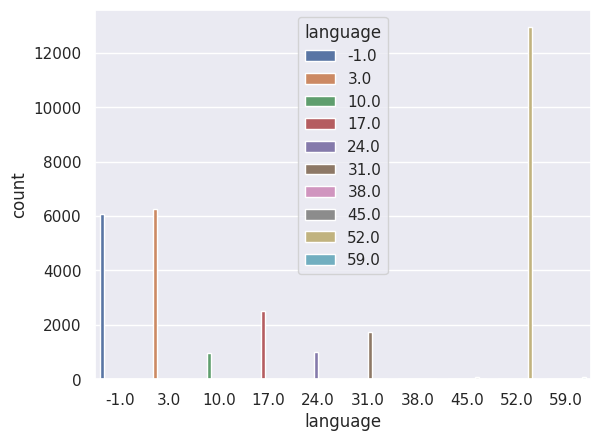

In [30]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

# Analyzing Members Dataset -->

In [31]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1.0,0.0,NaN,7.0,20110820.0,20170920.0
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1.0,0.0,NaN,7.0,20150628.0,20170622.0
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1.0,0.0,NaN,4.0,20160411.0,20170712.0
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1.0,0.0,NaN,9.0,20150906.0,20150907.0
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1.0,0.0,NaN,4.0,20170126.0,20170613.0
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13.0,43.0,female,9.0,20120703.0,20171006.0
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1.0,0.0,NaN,4.0,20160326.0,20160329.0
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1.0,0.0,NaN,7.0,20160130.0,20170930.0
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1.0,0.0,NaN,7.0,20110111.0,20170930.0
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1.0,0.0,NaN,7.0,20160217.0,20170613.0


In [32]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
6689,BzwM0/cd/I929129juCXRoYi/PGNju4BKsRhy82ePSA=,5.0,0.0,NaN,7.0,20141028.0,20171008.0
31,SOanReUpXJH3UEwvJ6aTcTadeSydUVKfxTLMT+eMUug=,1.0,0.0,NaN,4.0,20151007.0,20161108.0
23310,OWAbrLILUYvx2kHTa1MWgz3G7tFr6mGxNNbZJycjGmg=,5.0,28.0,female,9.0,20150206.0,20171231.0
15179,zGcQWIBLs3DMgVlHTPdkw+r0j7ehUjH4lq91Te9Lh2Y=,12.0,30.0,male,7.0,20110805.0,20170920.0
15006,TQqkPzs14ttL4l8c98IRVXUXEKhvCarZBEVKbmp1y28=,1.0,0.0,NaN,4.0,20170130.0,20170202.0
16755,PQ34i0acipNW1tcM5bnH6HwyFamK3Vigs09nk0r82HE=,5.0,33.0,male,3.0,20130411.0,20180128.0
20985,W/RS3k9UVtey13Ab7attLTv/n3oW6+cpAQBwSO1/Ing=,13.0,22.0,male,3.0,20140905.0,20170911.0
13537,1UHSpvSWKVPiJLRsJmsTiNC36q7PJoBQLBnI4NiKiQc=,4.0,48.0,female,3.0,20151018.0,20170616.0
14661,lhj4GOfB1/FUJiugTUpq2CvTq4xccFJpt6cPCbesB3Y=,15.0,18.0,female,3.0,20130330.0,20161026.0
28590,zA1S1dtdMnvfZncHVTh+XwDmrVxbT4emlkQYQ9FQ3hM=,1.0,0.0,NaN,3.0,20140427.0,20140504.0


In [33]:
members.shape

(28815, 7)

In [34]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [35]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,28814.000000,28814.000000,28814.000000,2.881400e+04,2.881400e+04
mean,5.372874,12.264385,5.955751,2.013999e+07,2.016901e+07
std,6.235033,17.627752,2.287774,2.956465e+04,7.444564e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012102e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015091e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [36]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28815 entries, 0 to 28814
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    28815 non-null  object 
 1   city                    28814 non-null  float64
 2   bd                      28814 non-null  float64
 3   gender                  12156 non-null  object 
 4   registered_via          28814 non-null  float64
 5   registration_init_time  28814 non-null  float64
 6   expiration_date         28814 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.5+ MB


In [37]:
members.isnull().sum()

msno                          0
city                          1
bd                            1
gender                    16659
registered_via                1
registration_init_time        1
expiration_date               1
dtype: int64

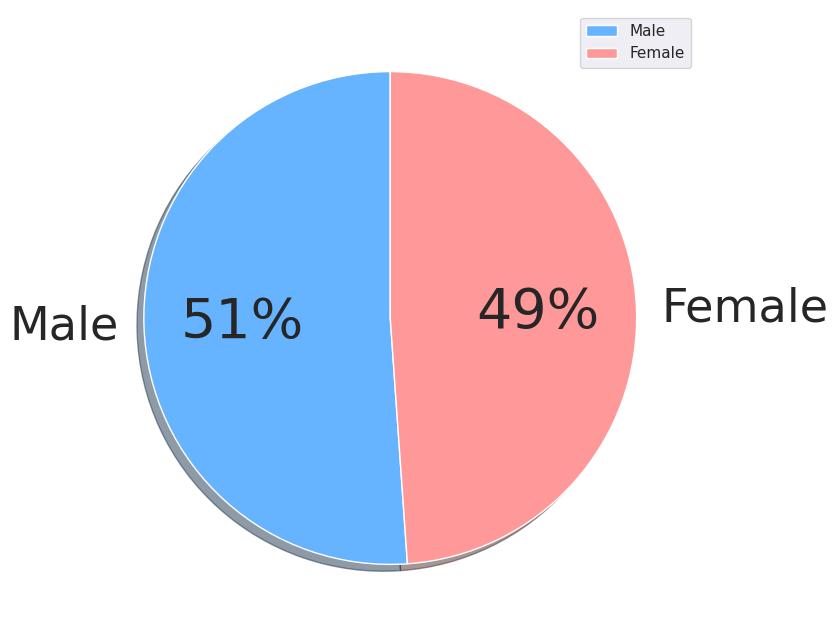

In [38]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes,
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

Most of the registrations happened via method '4', '7' and '9'.

<ipython-input-39-d4fd5afcf6d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(members.registration_init_time,color='orange')


Text(0.5, 1.0, 'PDF for Registration')

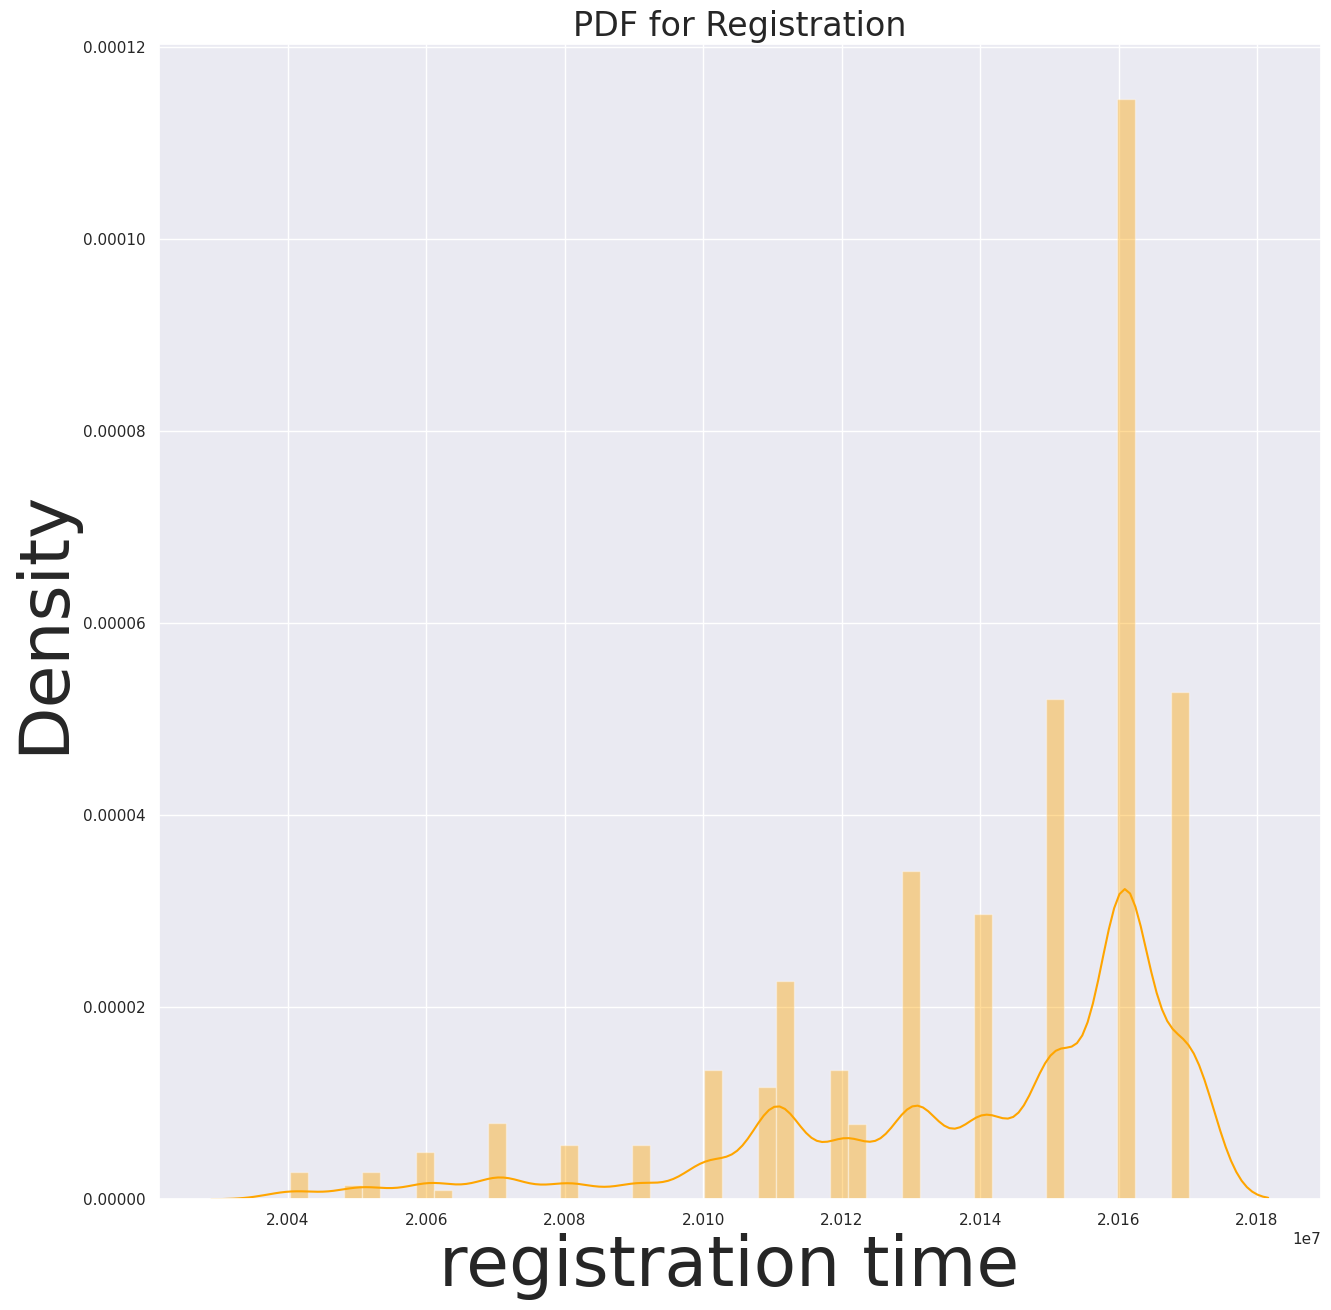

In [39]:
plt.figure(figsize = (15, 15))
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

In [40]:
def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6))
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

<ipython-input-40-80533538d392>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='purple')


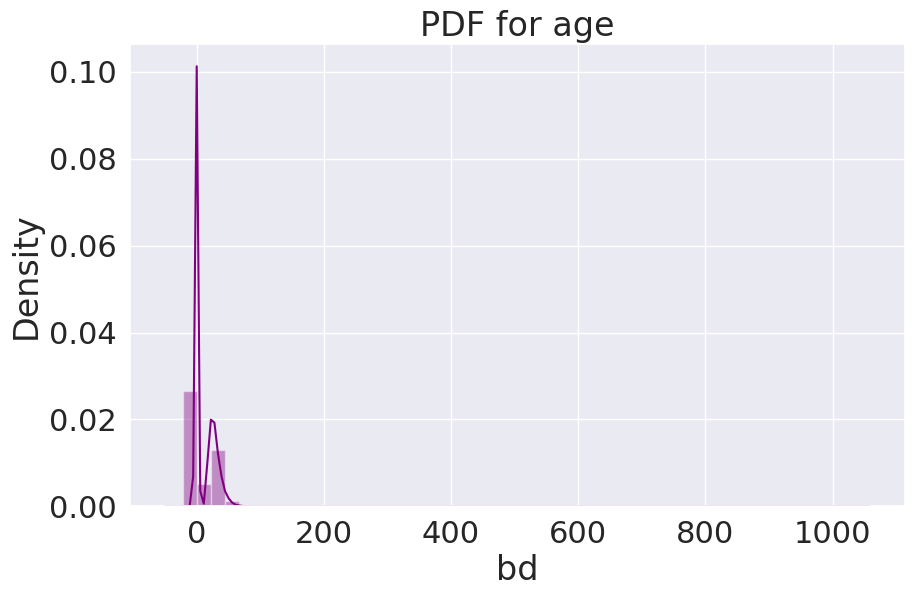

In [41]:
plot_pdf_cdf(members['bd'], False)

<ipython-input-40-80533538d392>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')


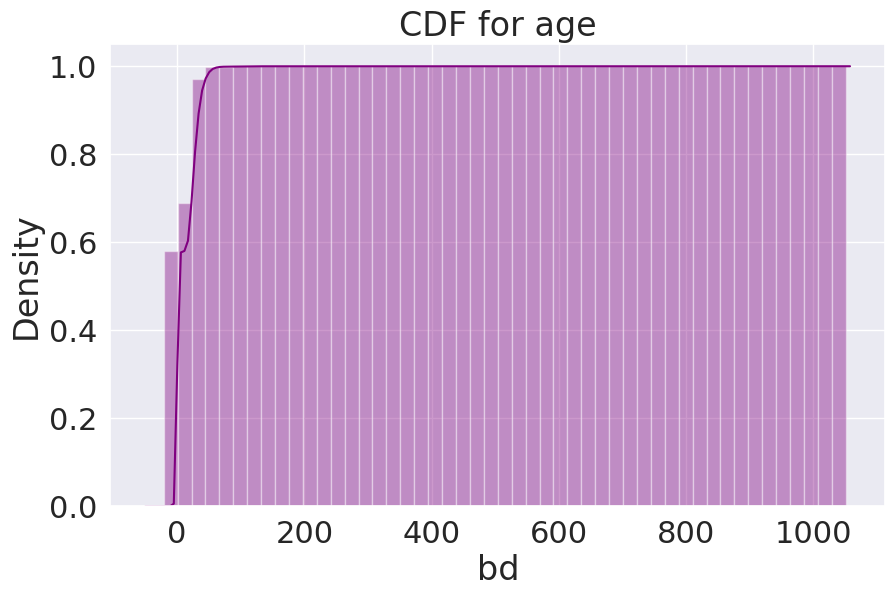

In [42]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [43]:
np.percentile(members['bd'].values, 98)

nan

# Data Processing and Cleaning -->

In [44]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [45]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [46]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [50]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')


In [51]:
train = train.fillna(-1)
test = test.fillna(-1)


In [52]:
import gc
del members, songs; gc.collect();

In [53]:
colm = list(train.columns)
colm.remove('target')

In [54]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 15/15 [00:00<00:00, 122.95it/s]


In [55]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [56]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model Building -->

In [57]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

In [58]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

Using LGBM model to predict Training Score and Accuracy -->

In [59]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [60]:
p_test = model1.predict(X_test)
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.400000%


# THANK YOU!!:)